<a href="https://colab.research.google.com/github/maryantonopoulou/teliki_ergasia_EDDE2/blob/main/%CE%A3%CF%85%CF%87%CE%BD%CF%8C%CF%84%CE%B5%CF%81%CE%B5%CF%82_%CE%BB%CE%B5%CE%BE%CE%B5%CE%B9%CF%82_%CE%B1%CE%BD%CE%AC_%CE%BC%CE%AD%CF%83%CE%BF_%CE%B1%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!python -m spacy download el_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/el_core_news_sm-3.8.0/el_core_news_sm-3.8.0-py3-none-any.whl (12.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
paradf=pd.read_csv('/content/drive/MyDrive/CSVFILES/filtered_ergatikaparapolitika.csv')
paradf['origin'] = 'Παραπολιτικά'
avdf=pd.read_csv("/content/drive/MyDrive/CSVFILES/filtered_ergatikaathensvoice.csv")
avdf['origin'] = 'Athens Voice'
nbdf=pd.read_csv("/content/drive/MyDrive/CSVFILES/filtered_ergatikanewsbomb.csv")
nbdf['origin'] = 'Newsbomb'
ktdf=pd.read_csv('/content/drive/MyDrive/CSVFILES/filtered_ergatikakathimerini.csv')
ktdf['origin'] = 'Καθημερινή'
nfdf=pd.read_csv('/content/drive/MyDrive/CSVFILES/filtered_ergatikanaftemboriki.csv')
nfdf['origin'] = 'Ναυτεμπορική'

In [ ]:
nlp = spacy.load("el_core_news_sm")

In [ ]:
greek_stopwords = nlp.Defaults.stop_words

In [ ]:
mystopwords=('00','nan','gr')

In [ ]:
greek_stopwords.update(mystopwords)
greek_stopwords_list = list(greek_stopwords)

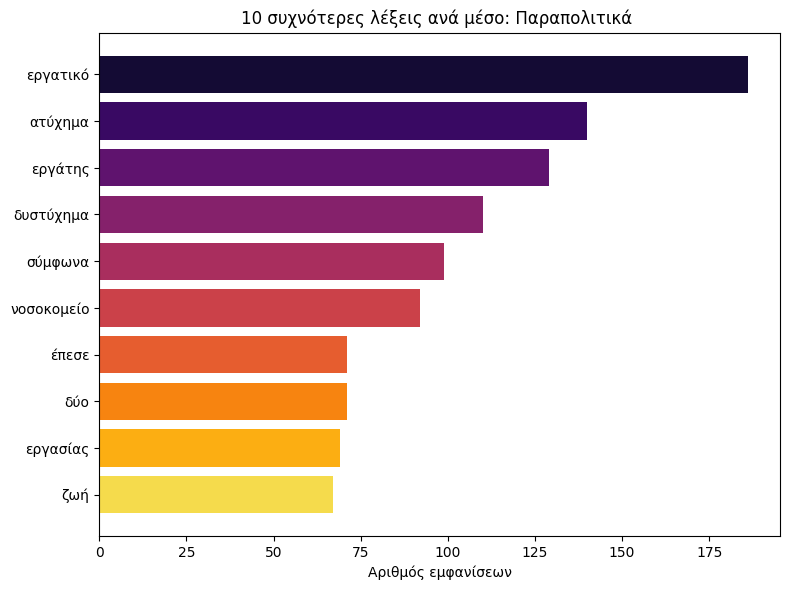

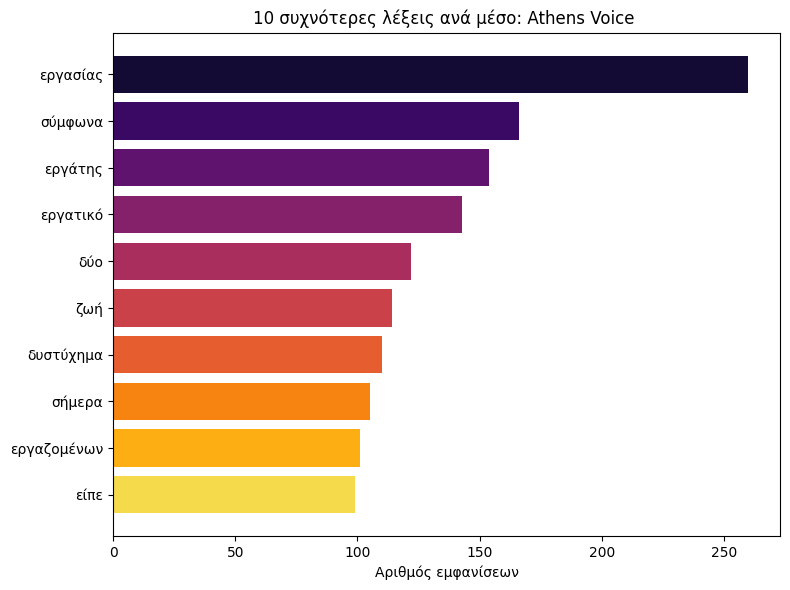

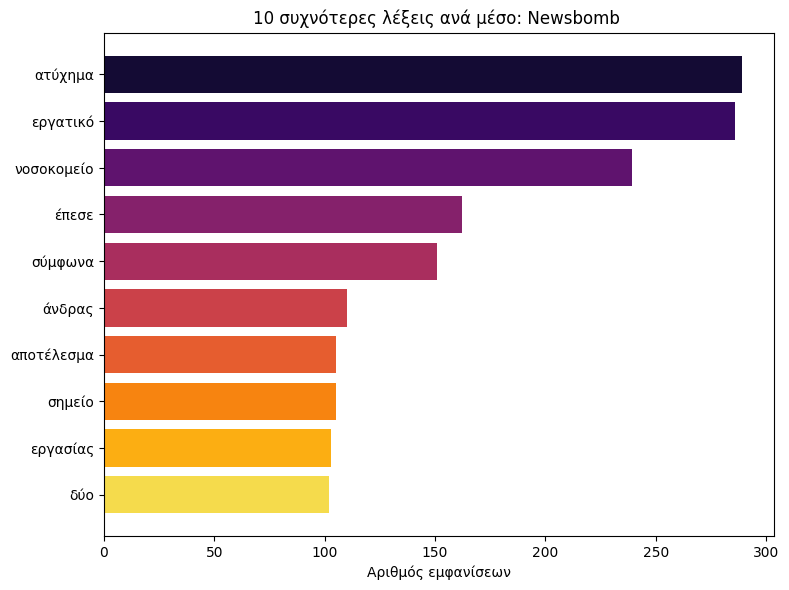

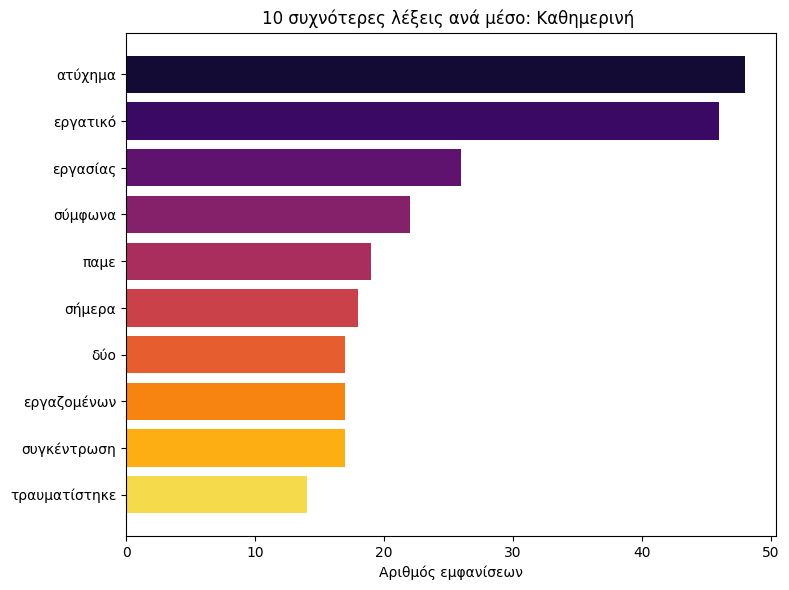

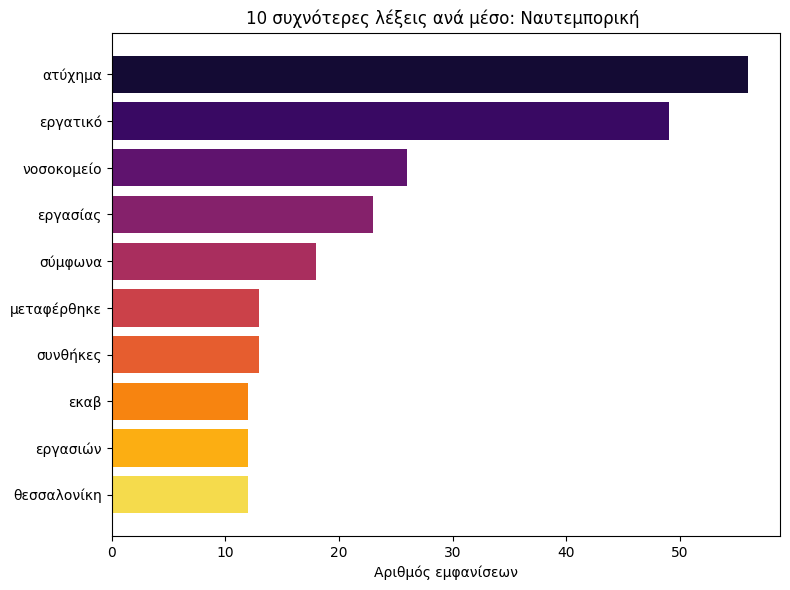

In [ ]:
nlp = spacy.load("el_core_news_sm")
greek_stopwords = list(nlp.Defaults.stop_words)

dfs = [
    (paradf, 'Παραπολιτικά'),
    (avdf, 'Athens Voice'),
    (nbdf, 'Newsbomb'),
    (ktdf, 'Καθημερινή'),
    (nfdf, 'Ναυτεμπορική')
]

sns.set_palette(sns.color_palette("inferno"))
colors = sns.color_palette("inferno", 10)


for df, name in dfs:
    texts = df['full_text'].astype(str).tolist()
    vectorizer = CountVectorizer(stop_words=greek_stopwords)
    X = vectorizer.fit_transform(texts)

    # Άθροισμα των εμφανίσεων λέξεων
    word_counts = np.array(X.sum(axis=0)).flatten()
    words = vectorizer.get_feature_names_out()

    word_freq = list(zip(words, word_counts))

    # Επιλογή 10 πιο συχνών λέξεων
    top10 = sorted(word_freq, key=lambda x: x[1], reverse=True)[:10]
    top_words, top_counts = zip(*top10)

    # Δημιουργία  ραβδογράμματος
    plt.figure(figsize=(8, 6))
    plt.barh(top_words, top_counts, color=colors)
    plt.xlabel('Αριθμός εμφανίσεων')
    plt.title(f'10 συχνότερες λέξεις ανά μέσο: {name} ')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()